In [59]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss, balanced_accuracy_score, accuracy_score

In [23]:
red_df=pd.read_csv('winequality-red.csv',sep=';')
white_df=pd.read_csv('winequality-white.csv',sep=';')


In [24]:
red_df.shape

(1599, 12)

In [25]:
white_df.shape

(4898, 12)

In [26]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [28]:
white_df['type']=1
red_df['type']=0

In [29]:
white_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [30]:
df= pd.concat([red_df, white_df], ignore_index=True)

In [31]:
df.sample(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
5740,6.8,0.280,0.29,11.90,0.052,51.0,149.0,0.99544,3.02,0.58,10.4,6,1
4820,6.6,0.240,0.38,12.75,0.034,8.0,74.0,0.99386,3.10,0.57,12.9,6,1
696,7.0,0.650,0.02,2.10,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6,0
2593,8.6,0.180,0.36,1.80,0.040,24.0,187.0,0.99560,3.25,0.55,9.5,6,1
2051,5.9,0.460,0.14,2.70,0.042,27.0,160.0,0.99310,3.46,0.51,10.6,7,1
5365,6.9,0.400,0.17,12.90,0.033,59.0,186.0,0.99754,3.08,0.49,9.4,5,1
260,7.9,0.330,0.23,1.70,0.077,18.0,45.0,0.99625,3.29,0.65,9.3,5,0
5184,7.0,0.240,0.35,1.00,0.032,42.0,104.0,0.98988,3.16,0.37,11.7,7,1
156,7.1,0.430,0.42,5.50,0.070,29.0,129.0,0.99730,3.42,0.72,10.5,5,0
3339,6.6,0.370,0.47,6.50,0.061,23.0,150.0,0.99540,3.14,0.45,9.6,6,1


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [33]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [34]:
features=df.drop(['type'],axis=1)
target=df['type']
print(features.shape)
print(target.shape)

(6497, 12)
(6497,)


In [35]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.25, random_state=42)

In [36]:
def balanced_accuracy_score_my(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    classes = np.unique(y_true)
    
    recall_scores = []
    
    for cls in classes:
        tp = np.sum((y_true == cls) & (y_pred == cls))
        fp = np.sum((y_true != cls) & (y_pred == cls))
        fn = np.sum((y_true == cls) & (y_pred != cls))
        
        if (tp + fn) > 0:
            sensitivity = tp / (tp + fn)
        else:
            sensitivity = 0.0
            
        recall_scores.append(sensitivity)
    
    
    balanced_accuracy = np.mean(recall_scores)
    
    return balanced_accuracy

In [37]:
y_true =  [0, 1, 1, 1, 1, 1, 1, 0, 1]
y_pred = [1, 0, 1, 1, 1, 1, 0, 0, 1]

In [38]:
my_score = balanced_accuracy_score_my(y_true, y_pred)
sklearn_score = balanced_accuracy_score(y_true, y_pred)
print("Сбалансированная точность (моя реализация):", my_score)
print("Сбалансированная точность (sklearn):", sklearn_score)

Сбалансированная точность (моя реализация): 0.6071428571428572
Сбалансированная точность (sklearn): 0.6071428571428572


In [39]:
max_depths = range(1, 20)
train_scores = []
val_scores = []

In [44]:
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(features_train, target_train)
    train_pred = model.predict(features_train)
    val_pred = model.predict(features_test)
    
    train_scores.append(accuracy_score(target_train, train_pred))
    val_scores.append(accuracy_score(target_test , val_pred))

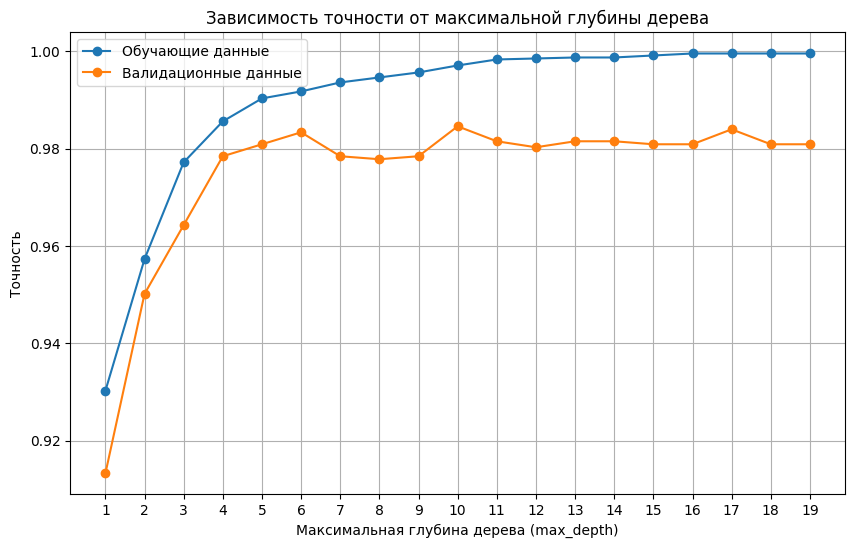

In [45]:
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Обучающие данные', marker='o')
plt.plot(max_depths, val_scores, label='Валидационные данные', marker='o')
plt.xlabel('Максимальная глубина дерева (max_depth)')
plt.ylabel('Точность')
plt.title('Зависимость точности от максимальной глубины дерева')
plt.legend()
plt.grid()
plt.xticks(max_depths)
plt.show()

In [46]:
best_val_score = max(val_scores)
best_max_depth = max_depths[val_scores.index(best_val_score)]

print(f"Лучший max_depth: {best_max_depth} с точностью: {best_val_score:.2f}")

Лучший max_depth: 10 с точностью: 0.98


In [47]:
max_depths = range(1, 11)  # Глубина деревьев от 1 до 10
n_estimators = range(10, 101, 10)  # Количество деревьев от 10 до 100

In [48]:
scores = np.zeros((len(max_depths), len(n_estimators)))

In [50]:
for i, max_depth in enumerate(max_depths):
    for j, n_est in enumerate(n_estimators):
        model = RandomForestClassifier(max_depth=max_depth, n_estimators=n_est, random_state=42)
        model.fit(features_train, target_train)

        val_pred = model.predict(features_test)
        scores[i, j] = accuracy_score(target_test, val_pred)

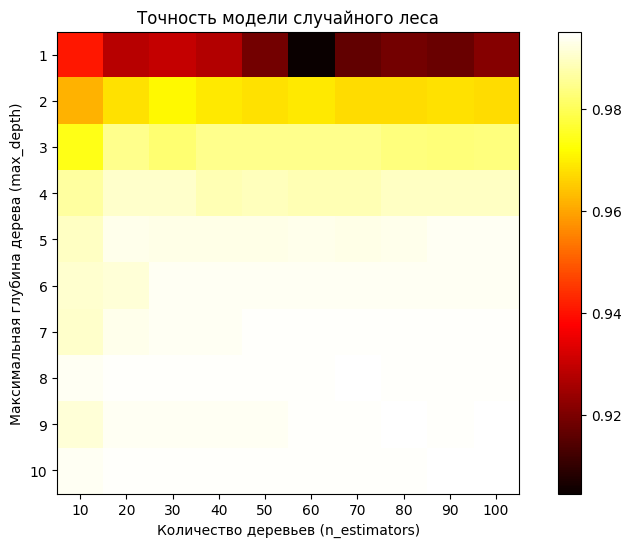

In [51]:
plt.figure(figsize=(10, 6))
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot)
plt.colorbar()
plt.xticks(np.arange(len(n_estimators)), n_estimators)
plt.yticks(np.arange(len(max_depths)), max_depths)
plt.xlabel('Количество деревьев (n_estimators)')
plt.ylabel('Максимальная глубина дерева (max_depth)')
plt.title('Точность модели случайного леса')
plt.show()

In [52]:
best_index = np.unravel_index(np.argmax(scores), scores.shape)
best_max_depth = max_depths[best_index[0]]
best_n_estimators = n_estimators[best_index[1]]
best_score = scores[best_index]

print(f"Наилучшие гиперпараметры: max_depth = {best_max_depth}, n_estimators = {best_n_estimators}, точность = {best_score:.2f}")

Наилучшие гиперпараметры: max_depth = 8, n_estimators = 70, точность = 1.00


In [55]:
n_estimators = 50  # Небольшое количество деревьев
max_depth = 3      # Глубина деревьев
learning_rate = 0.1 # Шаг градиентного бустинга


In [56]:
gb_model = GradientBoostingClassifier(n_estimators=n_estimators, 
                                       max_depth=max_depth, 
                                       learning_rate=learning_rate)

In [57]:
train_losses = []
val_losses = []

In [60]:
for i in range(1, n_estimators + 1):
    gb_model.n_estimators = i
    gb_model.fit(features_train, target_train)
    y_train_pred_proba = gb_model.predict_proba(features_train)
    y_val_pred_proba = gb_model.predict_proba(features_test)
    train_loss = log_loss(target_train, y_train_pred_proba)
    val_loss = log_loss(target_test, y_val_pred_proba)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
    print(f"Iteration: {i}, Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")


Iteration: 1, Train Loss: 0.4658, Validation Loss: 0.4941
Iteration: 2, Train Loss: 0.4033, Validation Loss: 0.4281
Iteration: 3, Train Loss: 0.3558, Validation Loss: 0.3789
Iteration: 4, Train Loss: 0.3166, Validation Loss: 0.3382
Iteration: 5, Train Loss: 0.2840, Validation Loss: 0.3050
Iteration: 6, Train Loss: 0.2562, Validation Loss: 0.2767
Iteration: 7, Train Loss: 0.2327, Validation Loss: 0.2526
Iteration: 8, Train Loss: 0.2123, Validation Loss: 0.2317
Iteration: 9, Train Loss: 0.1933, Validation Loss: 0.2121
Iteration: 10, Train Loss: 0.1768, Validation Loss: 0.1951
Iteration: 11, Train Loss: 0.1629, Validation Loss: 0.1812
Iteration: 12, Train Loss: 0.1498, Validation Loss: 0.1680
Iteration: 13, Train Loss: 0.1387, Validation Loss: 0.1570
Iteration: 14, Train Loss: 0.1283, Validation Loss: 0.1463
Iteration: 15, Train Loss: 0.1192, Validation Loss: 0.1370
Iteration: 16, Train Loss: 0.1107, Validation Loss: 0.1280
Iteration: 17, Train Loss: 0.1028, Validation Loss: 0.1201
Iterat

In [61]:
best_val_loss = min(val_losses)
best_iter = val_losses.index(best_val_loss) + 1
print(f"Best validation loss: {best_val_loss:.4f} at iteration {best_iter}")

Best validation loss: 0.0406 at iteration 50


In [62]:
params = [
    (0.01, 2),
    (0.1, 3),
    (0.2, 4),
    (0.3, 4),
]


In [63]:
best_model = None
best_score = float('inf')

In [64]:
for lr, md in params:
    gb_model = GradientBoostingClassifier(n_estimators=n_estimators, 
                                           max_depth=md, 
                                           learning_rate=lr)
    gb_model.fit(features_train, target_train)
    
    # Валидационная потеря
    y_val_pred_proba = gb_model.predict_proba(features_test)
    val_loss = log_loss(target_test, y_val_pred_proba)
    
    print(f"Learning Rate: {lr}, Max Depth: {md}, Validation Loss: {val_loss:.4f}")
    
    if val_loss < best_score:
        best_score = val_loss
        best_model = gb_model

print(f"Best parameters: Learning Rate={best_model.learning_rate}, Max Depth={best_model.max_depth}, Best Validation Loss: {best_score:.4f}")

Learning Rate: 0.01, Max Depth: 2, Validation Loss: 0.3287
Learning Rate: 0.1, Max Depth: 3, Validation Loss: 0.0404
Learning Rate: 0.2, Max Depth: 4, Validation Loss: 0.0236
Learning Rate: 0.3, Max Depth: 4, Validation Loss: 0.0249
Best parameters: Learning Rate=0.2, Max Depth=4, Best Validation Loss: 0.0236


In [65]:
n_estimators = 200  # Увеличенное количество деревьев
gb_model = GradientBoostingClassifier(n_estimators=n_estimators, 
                                       max_depth=best_model.max_depth, 
                                       learning_rate=best_model.learning_rate)
gb_model.fit(features_train, target_train)

# Подсчет валидационной потери
y_val_pred_proba = gb_model.predict_proba(features_test)
val_loss = log_loss(target_test, y_val_pred_proba)
print(f"Validation Loss with 200 trees: {val_loss:.4f}")

Validation Loss with 200 trees: 0.0347


Увеличение числа деревьев улучшает точность, но также может привести к переобучению, что можно избежать с помощью early_stopping_rounds

In [66]:
gb_model = GradientBoostingClassifier(n_estimators=n_estimators, 
                                       max_depth=best_model.max_depth, 
                                       learning_rate=best_model.learning_rate,
                                       validation_fraction=0.1, 
                                       n_iter_no_change=20, 
                                       tol=0.0001)

gb_model.fit(features_train, target_train)

print(f"Number of trees used after early stopping: {gb_model.n_estimators}")

Number of trees used after early stopping: 200


Лучшей точности удалось достигнуть с помощью обучения случайного леса 
Наилучшие гиперпараметры: max_depth = 8, n_estimators = 70, точность = 1.00
